- Module 4 Project
- Eric Sundstrom
- Instructor: Victor Geislinger

# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

- read in data from csv file
- check to make sure things look correct

In [2]:
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# Data Pre-Processing

- rename RegionName to ZipCode because that is what the data really is
- drop the RegionID columns as it is confusing to what it represents

In [3]:
df.rename(columns={'RegionName':'ZipCode'}, inplace=True)
df.drop('RegionID', axis=1, inplace=True)

- helper function to transform the given column strings to datetime format
- use the helper function

In [4]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[6:], format='%Y-%m')

In [5]:
df.columns.values[6:] = get_datetimes(df)
df.head()

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04-01 00:00:00,1996-05-01 00:00:00,1996-06-01 00:00:00,1996-07-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
0,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


# EDA & Visualizations

## Reasons to invest in a zipcode for housing

- Long-term growth
- Short-term growth
- Recession proof

## Diversity in Investments is very important

So I want to make sure in my 5 recommendations is variety in:
- Geographic location
- Housing Price Point
- Big cities/Metro areas vs. Small towns/more rural

----------------------------------------------------------------------------------------------------------------------

- Make column for total pct. change of house prices (to gauge long-term performance)

In [6]:
df['total_pct_change'] = (df[df.columns[-1]] - df[df.columns[6]])/df[df.columns[6]]*100

- Move new column from end to beginning so all time series data stay together

In [7]:
col = df.pop('total_pct_change') 
df.insert(5, col.name, col)

- Show differences in how these zipcodes' housing prices have changed from 1996 to 2018
- We can see how the vast majority of zip codes had overall growth around approx 100%
- A very small amount of zip codes has 0 or negative growth
- A small amount of zip codes excellent growth (400-1000+).  These are obviously the zip codes we are interested in for our recommendations

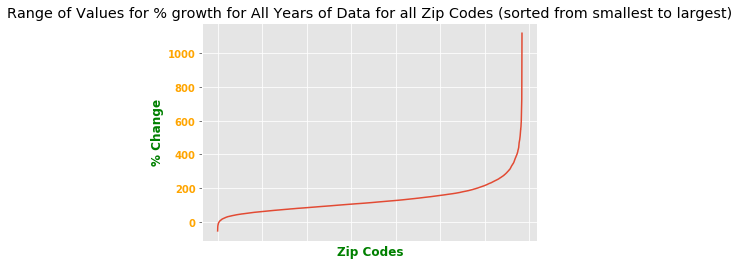

In [8]:
plt.plot(range(len(df)),df['total_pct_change'].sort_values().values)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('% Change', size='large', color='g', weight='bold')
plt.xlabel('Zip Codes', size='large', color='g', weight='bold')
plt.yticks(color='orange', weight='bold')
plt.title('Range of Values for % growth for All Years of Data for all Zip Codes (sorted from smallest to largest)')
plt.show()

- Identify column that is 5 years from last time series data point (2018-04-01)
- Make new columns for 5 year pct change (to gauge short-term performance)

In [9]:
df.columns[211]

Timestamp('2013-04-01 00:00:00')

In [10]:
df['5_year_pct_change'] = (df[df.columns[-1]] - df[df.columns[211]])/df[df.columns[211]]*100

- Move new column from end to beginning so all time series data stay together

In [11]:
col = df.pop('5_year_pct_change')
df.insert(5, col.name, col)

- Show differences in how these zipcodes' housing prices have changed from 2013 to 2018
- This past 5 year pct change criterion is different but similar to the total year pct change criterion
- Slightly more examples had negative growth
- Most were between 25 and 75
- But some zip codes still showed excellent growth up to ~175%

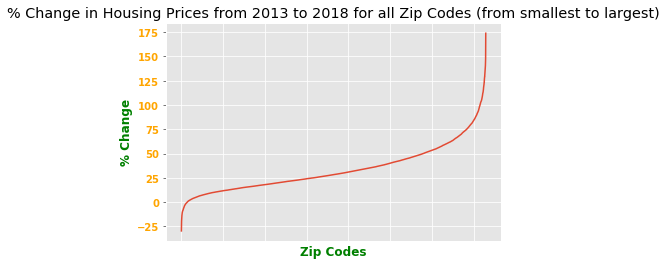

In [12]:
plt.plot(range(len(df)),df['5_year_pct_change'].sort_values().values)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('% Change', size='large', color='g', weight='bold')
plt.xlabel('Zip Codes', size='large', color='g', weight='bold')
plt.yticks(color='orange', weight='bold')
plt.title('% Change in Housing Prices from 2013 to 2018 for all Zip Codes (from smallest to largest)')
plt.show()

- Identify columns that mark beginning and end of major economic recession that heavily effected the housing market as a whole
- Make new column that measures pct change over the period of economic rececssion (to gauge volatility)

In [13]:
df.columns[148], df.columns[196]

(Timestamp('2007-12-01 00:00:00'), Timestamp('2011-12-01 00:00:00'))

In [14]:
df['recession_pct_change'] = (df[df.columns[196]] - df[df.columns[148]])/df[df.columns[148]]*100

- Move new column from end to beginning so all time series data stay together

In [15]:
col = df.pop('recession_pct_change') 
df.insert(5, col.name, col)

- Show differences in how these zipcodes' housing prices have changed during the recession
- This recession statistic is more interesting with the vast majority of zip codes seeing negative recession growth during the recession years
- Thankfully, there was still a small portion of zip codes that saw positive growth up to about 40%

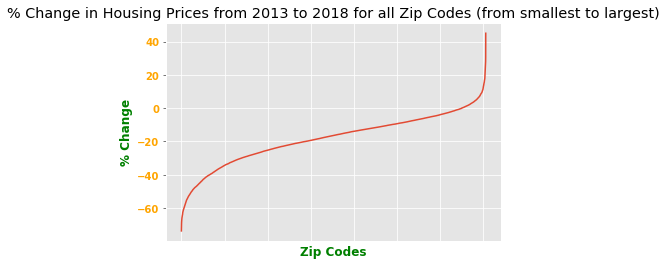

In [16]:
plt.plot(range(len(df)),df['recession_pct_change'].sort_values().values)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('% Change', size='large', color='g', weight='bold')
plt.xlabel('Zip Codes', size='large', color='g', weight='bold')
plt.yticks(color='orange', weight='bold')
plt.title('% Change in Housing Prices from 2013 to 2018 for all Zip Codes (from smallest to largest)')
plt.show()

## Selection

- Let's find the zipcodes with the best mix of success of our 3 new metrics 
- Are any in the top 5% of all 3 categories?

In [17]:
df[df.columns[5:8]].describe(percentiles=[.25,.5,.75,.9,.95])

,recession_pct_change,5_year_pct_change,total_pct_change
count,14110.000000,14572.000000,13684.000000
mean,-18.320535,33.657962,132.560521
std,14.901618,23.750621,86.601907
min,-73.749264,-29.672650,-53.260870
25%,-27.049009,16.898228,78.569073
50%,-16.420497,28.313301,113.948445
75%,-7.901792,45.467508,161.983287
90%,-1.347881,65.621376,233.585887
95%,2.573716,79.656663,292.739561
max,44.987775,173.872951,1118.993994


In [18]:
df.loc[(df['recession_pct_change']>2.5) & (df['5_year_pct_change']>79) & (df['total_pct_change']>292)]

,ZipCode,City,State,Metro,CountyName,recession_pct_change,5_year_pct_change,total_pct_change,SizeRank,1996-04-01 00:00:00,...,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,2018-01-01 00:00:00,2018-02-01 00:00:00,2018-03-01 00:00:00,2018-04-01 00:00:00
117,11211,New York,NY,New York,Kings,6.406859,106.867117,1118.993994,118,133200.0,...,1405100,1406400,1424700,1435300,1440500,1463100,1496100,1531100,1581900,1623700
1155,11222,New York,NY,New York,Kings,10.828025,118.247527,1053.552279,1156,149200.0,...,1598000,1623800,1638700,1640400,1644100,1651200,1661800,1672800,1694000,1721100
1773,2139,Cambridge,MA,Boston,Middlesex,3.778832,97.799686,551.482353,1774,212500.0,...,1234700,1248100,1259200,1278600,1303600,1325000,1342600,1369600,1386300,1384400
2054,94303,Palo Alto,CA,San Jose,Santa Clara,5.802239,86.118864,630.403420,2055,374300.0,...,2416900,2456800,2522600,2598400,2647600,2657900,2659800,2683900,2718600,2733900
3325,15213,Pittsburgh,PA,Pittsburgh,Allegheny,3.624009,113.265306,356.553398,3326,41200.0,...,173900,175400,177500,181000,184600,186700,188000,188900,189000,188100
6160,2141,Cambridge,MA,Boston,Middlesex,3.580388,98.038038,553.368560,6161,151400.0,...,887800,896800,905900,917700,931300,941100,951200,966000,981500,989200
6563,15201,Pittsburgh,PA,Pittsburgh,Allegheny,6.156156,147.593583,438.372093,6564,34400.0,...,162300,164400,166100,167600,169000,170400,171400,173900,179700,185200
7500,2120,Boston,MA,Boston,Suffolk,4.311985,98.483146,702.954545,7501,88000.0,...,659200,669000,672500,680500,689100,696200,697000,704500,710400,706600
8350,78721,Austin,TX,Austin,Travis,2.993585,104.488950,327.890173,8351,69200.0,...,279600,281200,281500,284000,288500,293000,296300,297800,297200,296100
13591,95389,El Portal,CA,NaN,Mariposa,3.649001,83.785740,386.864813,13592,104300.0,...,495200,494000,496800,500100,500400,500100,502100,504400,506900,507800


- Thankfully there are 10 total zip codes that placed in the top 5% of each of the criteria.  I was worried that while some zip codes would be among the best in 1 or 2 criteria that maybe none would be at the top of the 'class' of all 3
- There is a good mix of smaller and larger zipcodes, and lower and upper housing price ranges
- I will pick the 5 to recommend from these 10 taking into account variety so I can help the investors have a diversified portfolio in the housing market.  I especially didn't want to pick 2 from any city even though New York City and the Boston area accounted for 5 of our top 10
- My 5 recommendations are:
- 11211 (expensive homes, east coast, big city)
- 94303 (very expensive homes, west coast)
- 15201 (inexpensive homes, big city, midwest)
- 78721 (mid-level homes, southwest)
- 95389 (mid-level homes, west coast, small city)

In [19]:
#Create a new dataframe of just the top5 
top5 = [11211, 94303, 15201, 78721, 95389]
top5_df = df[df['ZipCode'].isin(top5)]

helper function

In [20]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['ZipCode', 'City', 'State', 'Metro', 
                                  'CountyName', 'recession_pct_change', '5_year_pct_change', 
                                  'total_pct_change', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

- Create dataframes that are averages of all zipcodes (top 5 vs all) included, for purposes of comparison, using helper function
- I thought it would be simpler to take the averages of both my recommended zipcodes and the total average of all zip codes because then I could visualize 1 thing (line plot, or values in a bar graph) against another and it would be most clear
- Create graph showing huge difference between performance of the housing markets in my recommendations vs the average zip code

In [21]:
melted_top5 = melt_data(top5_df)
melted_orig = melt_data(df)

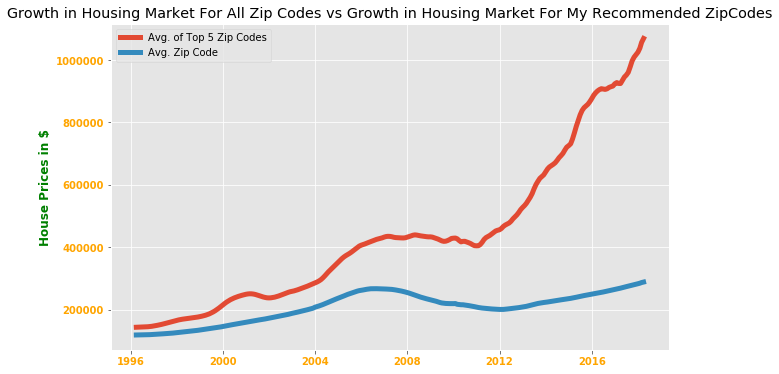

In [22]:
plt.figure(figsize=(10,6))
plt.plot(melted_top5.index, melted_top5.values, lw=5, label='Avg. of Top 5 Zip Codes')
plt.plot(melted_orig.index, melted_orig.values, lw=5, label='Avg. Zip Code')
plt.ylabel('House Prices in $', size='large', color='g', weight='bold')
plt.title('Growth in Housing Market For All Zip Codes vs Growth in Housing Market For My Recommended ZipCodes')
plt.yticks(color='orange', weight='bold')
plt.xticks(color='orange', weight='bold')
plt.legend()
plt.show()

- Graph Showing Exactly How Much the best zipcodes outperform the average zipcode in our 3 metrics

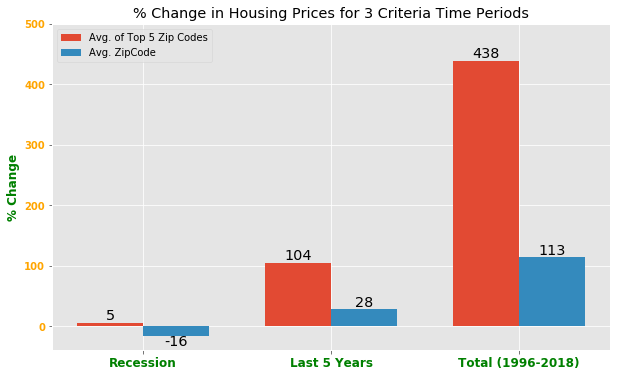

In [23]:
N = 3
top5_medians = top5_df[top5_df.columns[5:8]].median().values
all_medians = df[df.columns[5:8]].median().values

ind = np.arange(N) 
width = 0.35 

plt.figure(figsize=(10,6))
bars1 = plt.bar(ind, top5_medians, width, label='Avg. of Top 5 Zip Codes')
bars2 = plt.bar(ind + width, all_medians, width,
    label='Avg. ZipCode')

for rect in bars1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', size='x-large')
for rect in bars2:
    height = rect.get_height()
    if(height<0):
        plt.text(rect.get_x() + rect.get_width()/2.0, height-20, '%d' % int(height), ha='center', va='bottom', size='x-large')
    else:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', size='x-large')

plt.ylabel('% Change', size='large', color='g', weight='bold')
plt.title('% Change in Housing Prices for 3 Criteria Time Periods')

plt.xticks(ind + width / 2, ('Recession', 'Last 5 Years', 'Total (1996-2018)'), size='large', color='g', weight='bold')
plt.ylim(top=500)
plt.yticks(color='orange', weight='bold')
plt.legend(loc='best')
plt.show()

# Modeling

### Create Model

- The model I am making is going to be based on the average data from the top5 recommended zipcodes.  These ARIMA models can only take in one time series at a time so instead of making 5 different models trained from each of the top5 zip codes I would combine them all into one (via mean at each time period).  This will make visualization more easy on the eyes and also helps against possible overfitting because the model will now have to account for 5 similar but slightly different trends/movement

-------------------------------------------------------------------------------------------------------------------------------

- Set up combinations of parameters so we can find the best fit for our model

In [24]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0,4)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

- Create test variable for modelling that makes tweaking data input a 1 line code change instead of many

In [25]:
test = melted_top5

- Train models using SARIMAX with all possible parameter combinations and record the AIC score of each model

In [26]:
ans = []
for comb in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(test,
                                        order=comb)

        output = mod.fit()
        ans.append([comb, output.aic])
    except:
        continue

- Show the model with the lowest AIC score

In [27]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq    (2, 3, 2)
aic      4712.11
Name: 28, dtype: object

- Use the chosen parameters to fit the model we will now use for forecasting
- Show significance of each feature

In [28]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(test,
                                order=(2, 3, 2))

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2460      0.057     21.755      0.000       1.134       1.358
ar.L2         -0.4186      0.036    -11.540      0.000      -0.490      -0.347
ma.L1         -1.8919      0.051    -37.243      0.000      -1.991      -1.792
ma.L2          0.8933      0.050     17.793      0.000       0.795       0.992
sigma2      3.534e+06   4.83e-09   7.32e+14      0.000    3.53e+06    3.53e+06


### Validate Model

- Do a One-Step Ahead Forecast from 2014-2018 to test our model's forecasting abilities
- Plot comparison showing only data from 2010 onward to make it easier to visualize the forecasted part as that is what we are interested in this graph
- (Keep in mind that though the graph only shows 2010 to 2018, our model was trained on the entire data set from 1996-2018)

In [29]:
pred = output.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_conf = pred.conf_int()

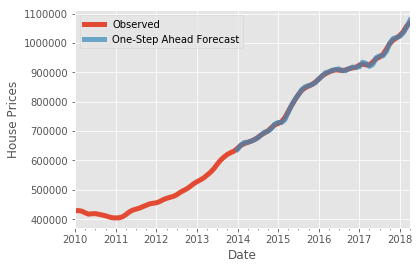

In [30]:
#Plot observed values
ax = test['2010':].plot(lw=5)

#Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, lw=5)

#Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Prices')
ax.legend(['Observed','One-Step Ahead Forecast'])

plt.show()

- The forecast largely matches the observed values from 2014-2018.  This is a good sign that our model can forecast accurately but we now do a dynamic forecast to further judge

-------------------------------------------------------------------------------------------------------------------------------

- Do a Dynamic Forecast (again from 2014-2018) to even further (and more realistically) gauge the accuracy of our model's ability to forecast accurately
- Plot comparison showing only data from 2010 onward to make it easier to visualize the forecasted part as that is what we are interested in this graph
- (Keep in mind that though the graph only shows 2010 to 2018, our model was trained on the entire data set from 1996-2018)

In [31]:
# Get dynamic predictions with confidence intervals 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

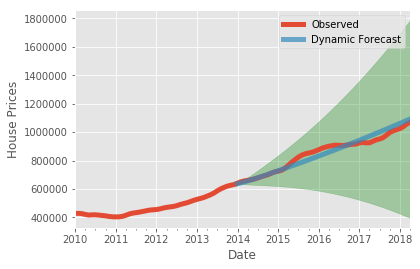

In [32]:
ax = test['2010':].plot(lw=5)
pred_dynamic.predicted_mean.plot(lw=5, ax=ax, alpha=.7)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices')
ax.legend(['Observed','Dynamic Forecast'])

plt.show()

- This forecast has more error than the one-step foreacting but I think it sufficiently captures the overall trend so I think it's fair to move forward with this model for actual future forecasting

### Forecast

- Get Forecasts for 3 years (36 months)
- Get Confidence Intervals
- Plot Entire Time Series plus Forecast

In [33]:
prediction = output.get_forecast(steps=36)

pred_conf = prediction.conf_int()

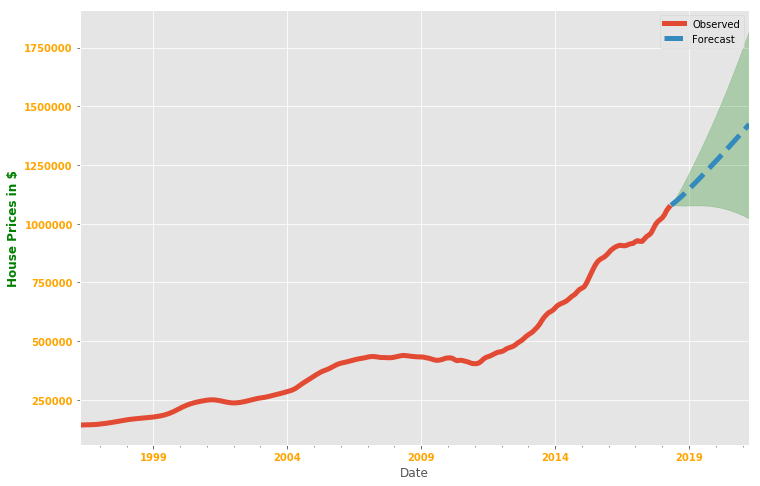

In [34]:
ax = test.plot(lw=5, figsize=(12,8))
prediction.predicted_mean.plot(ax=ax, lw=5, ls='--')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices in $', color='g', weight='bold')
plt.yticks(color='orange', weight='bold')
plt.xticks(color='orange', weight='bold')
ax.legend(['Observed','Forecast'])

plt.show()

- The forecast looks very reasonable to me.  The increase isn't quite as steep as the observed last few years but that makes sense because the model is supposed to take all the data into account and the growth rates weren't as high from 1996-2012

-------------------------------------------------------------------------------------------------------------------------------

- Get % Growth from the 3 years of new future forecasted data
- Store in variable for later

In [35]:
forecasted_3yr_pct_chg_recs = (prediction.predicted_mean[-1] - prediction.predicted_mean[0])/prediction.predicted_mean[-1]*100
forecasted_3yr_pct_chg_recs = round(forecasted_3yr_pct_chg_recs,1)

### Quick Second Model For Comparison

- This model, like the first model, uses average housing price (at each time index) of multiple zip codes.  This time using ALL the available zip codes. That's because this model is supposed to represent your average housing market forecasting.  

In [36]:
test2 = melted_orig

In [37]:
ans = []
for comb in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(test2,
                                        order=comb)

        output = mod.fit()
        ans.append([comb, output.aic])
    except:
        continue
        
ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq    (0, 2, 1)
aic      3719.93
Name: 6, dtype: object

In [38]:
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(test2,
                                order=(0, 2, 1))

output = ARIMA_MODEL.fit()

In [39]:
prediction = output.get_forecast(steps=36)

pred_conf = prediction.conf_int()

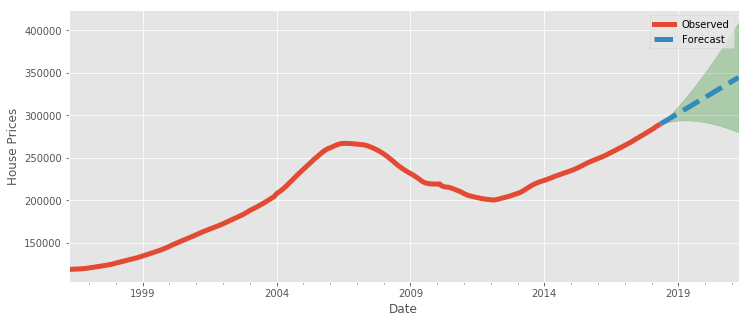

In [40]:
ax = test2.plot(lw=5, figsize=(12,5))
prediction.predicted_mean.plot(ax=ax, lw=5, ls='--')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('House Prices')
ax.legend(['Observed','Forecast'])

plt.show()

I'm a little surprised the forecasted growth is as steep as it shows.  It's basically not taking into account the negative growth during the recession years.  I thought the forecast would be increasing but at a more tempered rate.  

### Chart Showing Difference in Growth Based On Forecasting (Top 5 vs. Average)

In [41]:
forecasted_3yr_pct_chg_orig = (prediction.predicted_mean[-1] - prediction.predicted_mean[0])/prediction.predicted_mean[-1]*100
forecasted_3yr_pct_chg_orig = round(forecasted_3yr_pct_chg_orig,1)

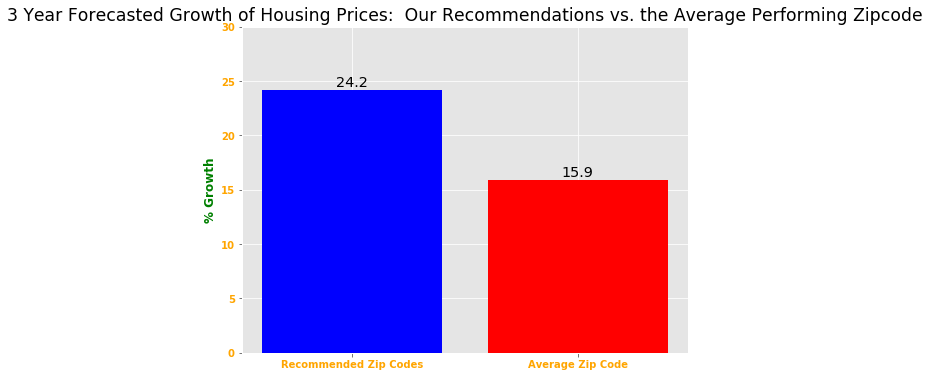

In [42]:
plt.figure(figsize=(8,6))
bars = plt.bar(['Recommended Zip Codes', 'Average Zip Code'], [24.2, 15.9], color=['b', 'r'])
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, height, ha='center', va='bottom', size='x-large')
plt.title("3 Year Forecasted Growth of Housing Prices:  Our Recommendations vs. the Average Performing Zipcode", 
          size='xx-large')
plt.ylabel('% Growth', color='g', weight='bold')
plt.yticks(color='orange', weight='bold')
plt.xticks(color='orange', weight='bold')
plt.ylim(0,30)
plt.show()

# Wrap-Up

- The most important thing to me for being able to identify what I thought were the zip codes with the absolute best investment potential was finding those zip codes fit ALL 3 of these criteria:
  - Extraordinary Proven Long Term Growth
  - Extraordinary Proven Short Term Growth
  - No negative growth, even during a major recession
  
- Thankfully there were 10 zip codes that were in the top 5% of performers for all those categories
- So at that point I knew I would be choosing my 5 recommendations from that pool of 10
- But now I wanted to make sure that there was diversification between the zipcodes I would choose to be the best
- Thankfully there was a great mix of zipcode among the top 10.  Here are my final 5 recommendations again with a little notation next to each as to how they bring variety to investment:
  - 11211 (expensive homes, east coast, big city)
  - 94303 (very expensive homes, west coast)
  - 15201 (inexpensive homes, big city, midwest)
  - 78721 (mid-level homes, southwest)
  - 95389 (mid-level homes, west coast, small city)
  
- If there was not any variety in the 10 zipcodes I was choosing from for my top 5, I would have expanded my pool of 'best' candidates.  Because even though that would have brought in zip codes with slightly less impressive scores on the 3 criteria, diversity of investments is important enough to take that on (to a degree of course)